<div style="border-radius:10px; padding: 15px; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200> Aim:</font></h2>


- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

    
- **Recommendation System**: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness. 
</div>

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1 |</span><span style='color:#ff6200'> Setup and Initilization</span></b>


<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">
    <b><span style='color:#fcc36d'>Step 1.1 |</span><span> Importing nessesary Library </span> <br>
First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project: </div>

In [6]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [7]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [8]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'>Loading the Dataset</span></b>


<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">    
Next, I will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis: </div>

In [9]:
df = pd.read_csv('./transaction_data.csv',na_values=(" ","?","_","-1"), encoding="ISO-8859-1")

In [10]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166.0,6355745,Sat Feb 02 12:50:00 IST 2019,465549.0,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701.0,6283376,Wed Dec 26 09:06:00 IST 2018,482370.0,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099.0,6385599,Fri Feb 15 09:45:00 IST 2019,490728.0,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478.0,6044973,Fri Jun 22 07:14:00 IST 2018,459186.0,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,NaN,6143225,Mon Sep 10 11:58:00 IST 2018,1733592.0,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131.0,6040298,Mon Jun 18 09:18:00 IST 2018,437976.0,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743.0,6387117,Sat Feb 16 09:14:00 IST 2019,484113.0,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,NaN,6361817,Tue Feb 05 05:26:00 IST 2019,497595.0,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765.0,5945500,Fri Mar 23 06:26:00 IST 2018,470883.0,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [11]:
# Dictionary mapping old column names to new column names
column_mappings = {
    'UserId': 'CustomerID',
    'TransactionId': 'InvoiceNo',
    'TransactionTime': 'InvoiceDate',
    'ItemCode': 'StockCode',
    'ItemDescription': 'Description',
    'NumberOfItemsPurchased': 'Quantity',
    'CostPerItem': 'UnitPrice',
    'Country': 'Country'  # This stays the same but is included for completeness
}

# Rename the columns
df = df.rename(columns=column_mappings)

# Now df has the columns renamed as specified
df = df.sort_values(by='InvoiceDate')

<a id="initial_analysis"></a>
# <b><span style='color:#fcc36d'> Step 2 | </span><span style='color:#fcc36d'>Initial Data Analysis</span>


<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">
    
Afterward, I am going to gain a thorough understanding of the dataset before proceeding to the data cleaning and transformation stages.</div>

<a id="overview"></a>
<h2><span style='color:#fcc36d'>Step 2.1 |</span><span style='color:#ff6200'> Dataset Overview</span></h2>


<div style="border-radius:10px; padding: 15px;  font-size:120%; text-align:left">
First I will perform a preliminary analysis to understand the structure and types of data columns: </div>

In [12]:
df.head(10)

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
432402,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1528779.0,PINK PILLAR CANDLE SILVER FLOCK,3,4.08,United Kingdom
446762,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom
464683,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1528779.0,IVORY PILLAR CANDLE GOLD FLOCK,3,4.08,United Kingdom
400290,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1732164.0,WOOD BLACK BOARD ANT WHITE FINISH,6,8.91,United Kingdom
837706,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom
402947,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom
881206,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1732374.0,WOODEN FRAME ANTIQUE WHITE,18,4.08,United Kingdom
861201,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1732206.0,WOOD S/3 CABINET ANT WHITE FINISH,12,10.98,United Kingdom
778432,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,447573.0,GLASS HEART T-LIGHT HOLDER,72,1.18,United Kingdom
70171,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083818 entries, 432402 to 717499
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   CustomerID   813658 non-null   float64
 1   InvoiceNo    1083818 non-null  int64  
 2   InvoiceDate  1083818 non-null  object 
 3   StockCode    1078226 non-null  float64
 4   Description  1080816 non-null  object 
 5   Quantity     1083818 non-null  int64  
 6   UnitPrice    1083818 non-null  float64
 7   Country      1083818 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 74.4+ MB


<a id="statistics"></a>
<h2><span style='color:#fcc36d'>Step 2.2 |</span><span style='color:#ff6200'> Summary Statistics</span></h2>


<div style="border-radius:10px; padding: 15px; font-size:110%; text-align:left">
    
Now, I am going to generate summary statistics to gain initial insights into the data distribution: </div>

In [14]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,813658.0,3.210415e+05,35985.584256,259266.00,293013.00,318192.00,352611.0,384027.00
InvoiceNo,1083818.0,6.159417e+06,147634.093880,5900015.00,6026856.00,6166611.00,6289569.0,6397457.00
StockCode,1078226.0,6.616827e+05,451307.849053,42.00,461496.00,475419.00,488964.0,1894494.00
Quantity,1083818.0,2.865675e+01,654.243172,-242985.00,3.00,9.00,30.0,242985.00
UnitPrice,1083818.0,9.498798e+00,2308.138578,-15265.64,1.73,2.88,5.7,1696285.44


In [15]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceDate,1083818,23260,Sat Jan 12 10:41:00 IST 2019,2228
Description,1080816,4222,WHITE HANGING HEART T-LIGHT HOLDER,4738
Country,1083818,38,United Kingdom,990956


<a id="data_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3 |  Data Cleaning & Transformation</span>


<div style="border-radius:10px; padding: 15px; font-size:110%; text-align:left">

This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling. </div>

<a id="missing_values"></a>
# <b><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#ff6200'> Handling Missing Values</span></b>


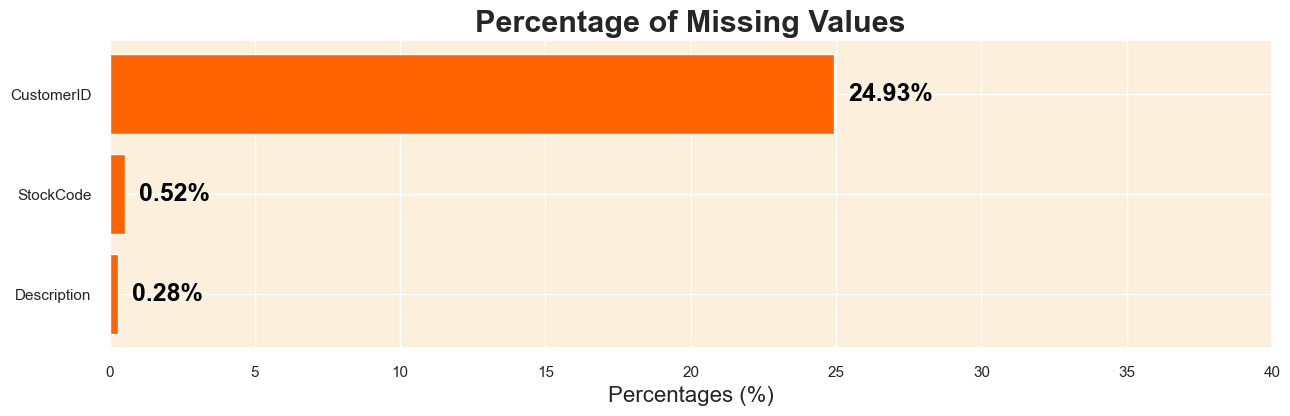

In [16]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [17]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
887319,NaN,6121489,Fri Aug 24 12:39:00 IST 2018,471576.0,NATURAL SLATE CHALKBOARD LARGE,3,6.84,United Kingdom
534750,NaN,6121489,Fri Aug 24 12:39:00 IST 2018,478842.0,FAUX FUR CHOCOLATE THROW,6,27.54,United Kingdom
577586,NaN,6121489,Fri Aug 24 12:39:00 IST 2018,471576.0,NATURAL SLATE CHALKBOARD LARGE,3,6.84,United Kingdom
407380,NaN,6121489,Fri Aug 24 12:39:00 IST 2018,478842.0,FAUX FUR CHOCOLATE THROW,6,27.54,United Kingdom
614635,NaN,6261607,Fri Dec 14 11:50:00 IST 2018,494319.0,WALL ART LOVES' SECRET,6,8.22,United Kingdom


In [18]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID'])

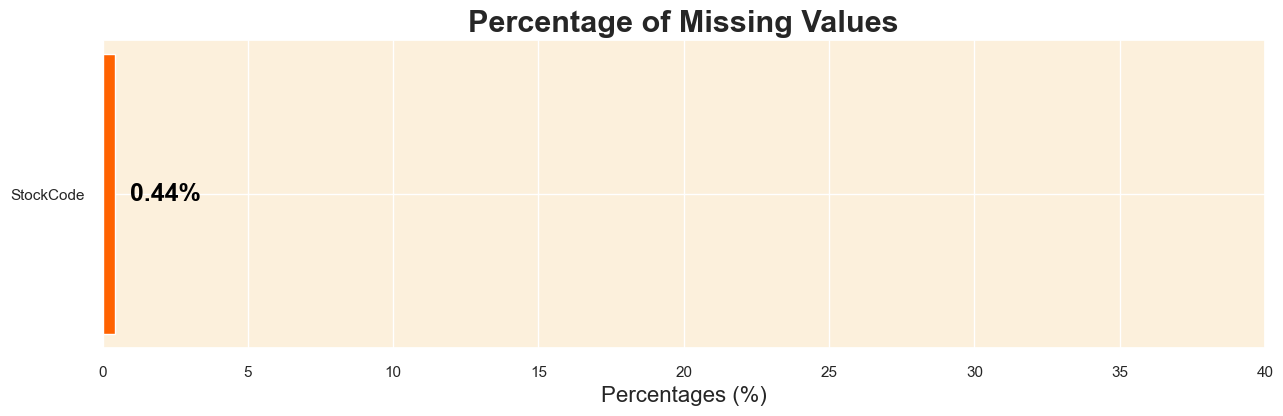

In [19]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<a id="duplicates"></a>
# <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'> Handling Duplicates</span></b>


### Next, I am going to recognize duplicate rows in the dataset:

In [20]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
1024276,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,456330.0,GLASS STAR FROSTED T-LIGHT HOLDER,18,5.87,United Kingdom
920591,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,456330.0,GLASS STAR FROSTED T-LIGHT HOLDER,18,5.87,United Kingdom
55169,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,477792.0,SET 7 BABUSHKA NESTING BOXES,6,10.56,United Kingdom
508218,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,477792.0,SET 7 BABUSHKA NESTING BOXES,6,10.56,United Kingdom
323263,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1492113.0,WHITE METAL LANTERN,18,4.68,United Kingdom
635173,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1492113.0,WHITE METAL LANTERN,18,4.68,United Kingdom
528742,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1764609.0,KNITTED UNION FLAG HOT WATER BOTTLE,18,4.68,United Kingdom
538323,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1764609.0,KNITTED UNION FLAG HOT WATER BOTTLE,18,4.68,United Kingdom
918916,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1764609.0,RED WOOLLY HOTTIE WHITE HEART.,18,4.68,United Kingdom
412255,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1764609.0,RED WOOLLY HOTTIE WHITE HEART.,18,4.68,United Kingdom


In [21]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 412089 duplicate rows that need to be removed.


In [22]:
# Getting the number of rows in the dataframe
df.shape[0]

401569

<a id="InvoiceNo_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> Treating Cancelled Transactions</span></b>


In [23]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = df['Quantity'] < 0
df['Transaction_Status'] = df['Transaction_Status'].astype(int)
# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 1]
cancelled_transactions.describe().drop('CustomerID', axis=1)

,InvoiceNo,StockCode,Quantity,UnitPrice,Transaction_Status
count,8.871000e+03,8.506000e+03,8871.000000,8871.000000,8871.0
mean,6.149158e+06,6.531598e+05,-92.328373,26.089900,1.0
std,1.426151e+05,4.381926e+05,3516.947922,614.397875,0.0
min,5.900169e+06,4.200000e+01,-242985.000000,0.020000,1.0
25%,6.022484e+06,4.655332e+05,-18.000000,2.010000,1.0
50%,6.156370e+06,4.771200e+05,-6.000000,4.080000,1.0
75%,6.269945e+06,4.873890e+05,-3.000000,6.840000,1.0
max,6.397259e+06,1.894431e+06,-3.000000,53778.600000,1.0


In [24]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


<a id="StockCode_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.4 |</span><span style='color:#ff6200'> Correcting StockCode Anomalies</span></b>


In [25]:
df['InvoiceNo'] = df['InvoiceNo'].astype('object')
df['StockCode'] = df['StockCode'].astype('object')

In [26]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3209


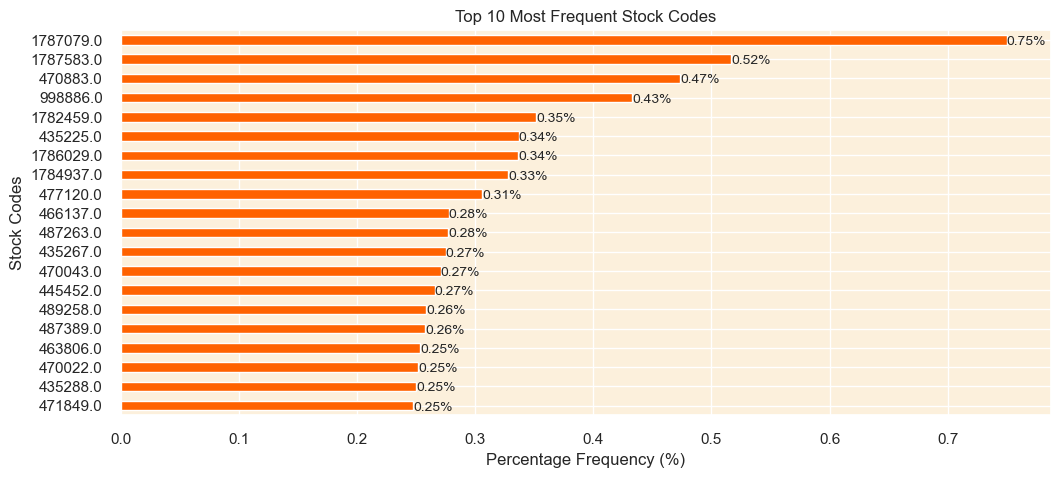

In [27]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(20) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [28]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
7    2530
8     678
0       1
3       1
dtype: int64


In [29]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 3)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
nan
42.0


In [30]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [31]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [32]:
# Getting the number of rows in the dataframe
df.shape[0]

399654

<a id="Description_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.5 |</span><span style='color:#ff6200'> Cleaning Description Column</span></b>


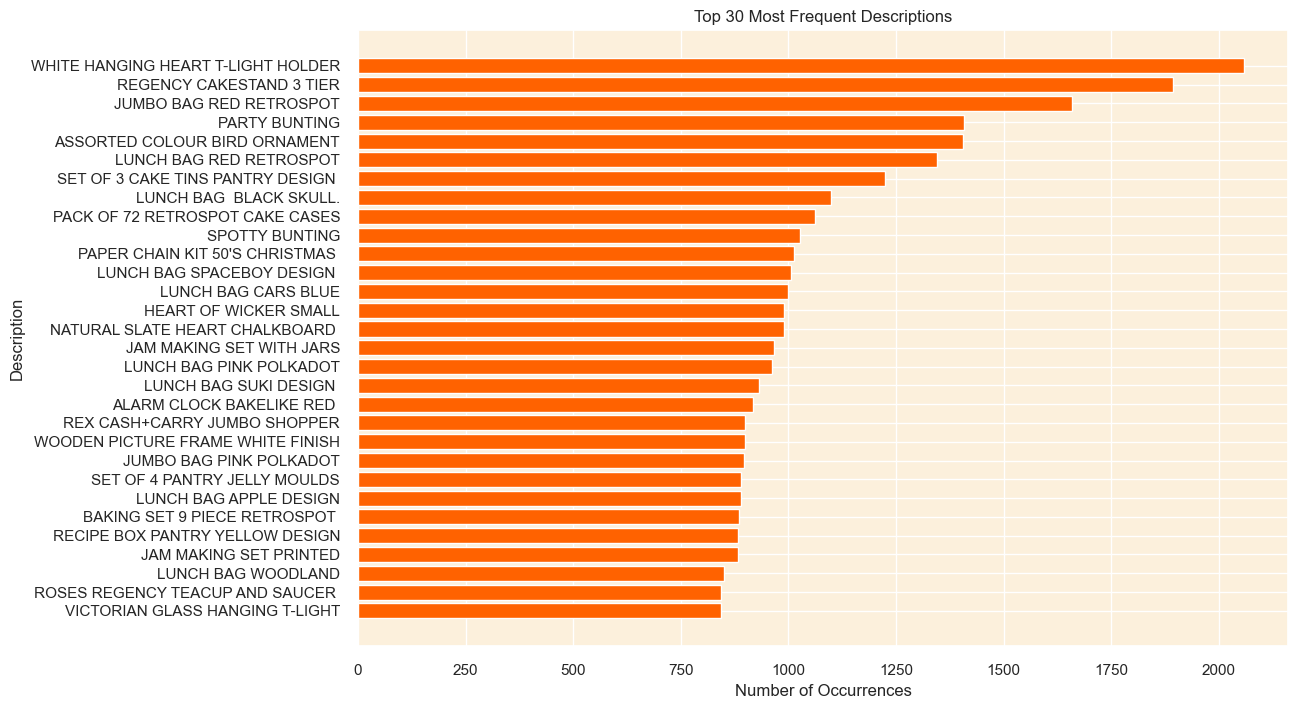

In [33]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

In [34]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
3 TRADITIONAl BISCUIT CUTTERS  SET
FLOWERS HANDBAG blue and orange
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FOLK ART GREETING CARD,pack/12
THE KING GIFT BAG 25x24x12cm
FRENCH BLUE METAL DOOR SIGN No
Next Day Carriage
BAG 500g SWIRLY MARBLES
NUMBER TILE COTTAGE GARDEN No
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 65CMx65CM
High Resolution Image
POLYESTER FILLER PAD 60x40cm


In [35]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [36]:
# Getting the number of rows in the dataframe
df.shape[0]

399571

<a id="UnitPrice_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.6 |</span><span style='color:#ff6200'> Treating Zero Unit Prices</span></b>


In [37]:
df['UnitPrice'].describe()

count    3.995710e+05
mean     8.259751e+00
std      2.683503e+03
min      0.000000e+00
25%      1.730000e+00
50%      2.700000e+00
75%      5.180000e+00
max      1.696285e+06
Name: UnitPrice, dtype: float64

In [38]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,1261.545455
std,6530.140825
min,3.000000
25%,6.000000
50%,33.000000
75%,108.000000
max,37620.000000


In [39]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

<a id="outlier_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.7 |</span><span style='color:#ff6200'> Outlier Treatment</span></b>


In [40]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [41]:
# Getting the number of rows in the dataframe
df.shape[0]

399538

In [42]:
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Transaction_Status
0,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1528779.0,PINK PILLAR CANDLE SILVER FLOCK,3,4.08,United Kingdom,0
1,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom,0
2,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1528779.0,IVORY PILLAR CANDLE GOLD FLOCK,3,4.08,United Kingdom,0
3,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1732164.0,WOOD BLACK BOARD ANT WHITE FINISH,6,8.91,United Kingdom,0
4,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
399533,372750.0,6162508,Wed Sep 26 13:29:00 IST 2018,483105.0,TRAVEL CARD WALLET I LOVE LONDON,216,0.58,United Kingdom,0
399534,372750.0,6162508,Wed Sep 26 13:29:00 IST 2018,444759.0,NO JUNK MAIL METAL SIGN,72,0.54,United Kingdom,0
399535,372750.0,6162508,Wed Sep 26 13:29:00 IST 2018,464415.0,METAL SIGN EMPIRE TEA,36,1.10,United Kingdom,0
399536,372750.0,6162508,Wed Sep 26 13:29:00 IST 2018,358764.0,LOVE POTION MASALA INCENSE,75,0.29,United Kingdom,0


# 

<a id="Filter-year"></a>
# <b><span style='color:#fcc36d'>Step 3.8 |</span><span style='color:#ff6200'> Filter year > 2019</span></b>


In [43]:
df['InvoiceDate'].max()

'Wed Sep 26 13:29:00 IST 2018'

In [44]:
df['InvoiceDate'].min()

'Fri Apr 06 06:15:00 IST 2018'

In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_year = df['InvoiceDate'].dt.year.max()
max_year
df = df[df['InvoiceDate'].dt.year != max_year]
df['InvoiceDate'].dt.year.max()

2019

<a id="question-2"></a>
# <b><span style='color:#fcc36d'>Step 3.9 |</span><span style='color:#ff6200'> Question 2</span></b>


In [46]:
import pandas as pd

# Assuming your DataFrame is named df
df_sample = df.copy()
df_sample2=df.copy()
# Convert 'InvoiceDate' column to datetime format
df_sample['InvoiceDate'] = pd.to_datetime(df_sample['InvoiceDate'])

# Extract year and month from 'InvoiceDate'
df_sample['Year'] = df_sample['InvoiceDate'].dt.year
df_sample['Month'] = df_sample['InvoiceDate'].dt.month

# Calculate total items purchased and total prices for each month in each year
monthly_summary = df_sample.groupby(['Year', 'Month']).agg({'Quantity': 'sum', 'UnitPrice': 'sum'})

# Print the results
print("Monthly Summary - Number of Items Purchased and Total Prices:")
print(monthly_summary)


Monthly Summary - Number of Items Purchased and Total Prices:
            Quantity   UnitPrice
Year Month                      
2018 2        726264  1794359.86
     3        559545    58251.72
     4        790959    93203.80
     5        906267   104781.69
     6       1022895   116143.70
     7       1030812   111020.45
     8       1042935   118034.04
     9        982275   102377.12
     10      1298127   107737.03
     11      1147134   115500.08
     12      1823526   195904.13
2019 1       1928412   221038.62
     2       1304184   156919.83


In [47]:
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Transaction_Status
0,362103.0,5960185,2018-04-06 06:15:00,1528779.0,PINK PILLAR CANDLE SILVER FLOCK,3,4.08,United Kingdom,0
1,362103.0,5960185,2018-04-06 06:15:00,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom,0
2,362103.0,5960185,2018-04-06 06:15:00,1528779.0,IVORY PILLAR CANDLE GOLD FLOCK,3,4.08,United Kingdom,0
3,362103.0,5960185,2018-04-06 06:15:00,1732164.0,WOOD BLACK BOARD ANT WHITE FINISH,6,8.91,United Kingdom,0
4,362103.0,5960185,2018-04-06 06:15:00,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
399533,372750.0,6162508,2018-09-26 13:29:00,483105.0,TRAVEL CARD WALLET I LOVE LONDON,216,0.58,United Kingdom,0
399534,372750.0,6162508,2018-09-26 13:29:00,444759.0,NO JUNK MAIL METAL SIGN,72,0.54,United Kingdom,0
399535,372750.0,6162508,2018-09-26 13:29:00,464415.0,METAL SIGN EMPIRE TEA,36,1.10,United Kingdom,0
399536,372750.0,6162508,2018-09-26 13:29:00,358764.0,LOVE POTION MASALA INCENSE,75,0.29,United Kingdom,0


<a id="question-3"></a>
# <b><span style='color:#fcc36d'>Step 3.10 |</span><span style='color:#ff6200'> Question 3</span></b>


In [48]:
import pandas as pd

# Assuming your DataFrame is named df

# Convert 'InvoiceDate' column to datetime format
df_sample2['InvoiceDate'] = pd.to_datetime(df_sample2['InvoiceDate'])

# Set 'InvoiceDate' as the index
df_sample2.set_index('InvoiceDate', inplace=True)

# Sort DataFrame by index
df_sample2.sort_index(inplace=True)

# Calculate the number of items purchased for each UserID in a 30-day window for each day
result = df_sample2.groupby('CustomerID').rolling('30D')['Quantity'].sum().reset_index()

# Print the result
print(result)


        CustomerID         InvoiceDate  Quantity
0         259266.0 2018-04-01 06:01:00  222645.0
1         259266.0 2018-04-01 06:17:00       0.0
2         259287.0 2018-04-09 10:30:00      12.0
3         259287.0 2018-04-09 10:30:00      24.0
4         259287.0 2018-04-09 10:30:00      36.0
...            ...                 ...       ...
398420    384027.0 2018-12-24 06:23:00    2826.0
398421    384027.0 2018-12-24 06:23:00    2970.0
398422    384027.0 2019-01-09 05:29:00    3042.0
398423    384027.0 2019-01-09 05:29:00    3150.0
398424    384027.0 2019-01-09 05:29:00    3294.0

[398425 rows x 3 columns]


<a id="feature_engineering"></a>
# <p style="font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Feature Engineering</p>


<a id="rfm_features"></a>
# <b><span style='color:#fcc36d'>Step 4.1 |</span><span style='color:#ff6200'> RFM Features</span></b>


<a id="recency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.1 |</span><span style='color:#ff6200'> Recency (R)</span></b>


In [49]:


# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()
# Remove all rows where 'InvoiceDay' is equal to the maximum value of 'InvoiceDay'


# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [50]:
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Transaction_Status,InvoiceDay
0,362103.0,5960185,2018-04-06 06:15:00,1528779.0,PINK PILLAR CANDLE SILVER FLOCK,3,4.08,United Kingdom,0,2018-04-06
1,362103.0,5960185,2018-04-06 06:15:00,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom,0,2018-04-06
2,362103.0,5960185,2018-04-06 06:15:00,1528779.0,IVORY PILLAR CANDLE GOLD FLOCK,3,4.08,United Kingdom,0,2018-04-06
3,362103.0,5960185,2018-04-06 06:15:00,1732164.0,WOOD BLACK BOARD ANT WHITE FINISH,6,8.91,United Kingdom,0,2018-04-06
4,362103.0,5960185,2018-04-06 06:15:00,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom,0,2018-04-06
...,...,...,...,...,...,...,...,...,...,...
399533,372750.0,6162508,2018-09-26 13:29:00,483105.0,TRAVEL CARD WALLET I LOVE LONDON,216,0.58,United Kingdom,0,2018-09-26
399534,372750.0,6162508,2018-09-26 13:29:00,444759.0,NO JUNK MAIL METAL SIGN,72,0.54,United Kingdom,0,2018-09-26
399535,372750.0,6162508,2018-09-26 13:29:00,464415.0,METAL SIGN EMPIRE TEA,36,1.10,United Kingdom,0,2018-09-26
399536,372750.0,6162508,2018-09-26 13:29:00,358764.0,LOVE POTION MASALA INCENSE,75,0.29,United Kingdom,0,2018-09-26


In [51]:
df['InvoiceDay'].max()

datetime.date(2019, 2, 20)

In [52]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,259266.0,325
1,259287.0,2
2,259308.0,75
3,259329.0,18
4,259350.0,310


<a id="frequency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.2 |</span><span style='color:#ff6200'> Frequency (F)</span></b>


In [53]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,259266.0,325,2,0
1,259287.0,2,6,6417
2,259308.0,75,4,6996
3,259329.0,18,1,1890
4,259350.0,310,1,588


<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 4.1.3 |</span><span style='color:#ff6200'> Monetary (M)</span></b>


In [54]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,259266.0,325,2,0,0.00,0.00
1,259287.0,2,6,6417,14928.18,2488.03
2,259308.0,75,4,6996,5991.12,1497.78
3,259329.0,18,1,1890,6043.92,6043.92
4,259350.0,310,1,588,1221.60,1221.60


<a id="product_diversity"></a>
# <b><span style='color:#fcc36d'>Step 4.2 |</span><span style='color:#ff6200'> Product Diversity</span></b>


In [55]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,259266.0,325,2,0,0.00,0.00,1
1,259287.0,2,6,6417,14928.18,2488.03,85
2,259308.0,75,4,6996,5991.12,1497.78,21
3,259329.0,18,1,1890,6043.92,6043.92,71
4,259350.0,310,1,588,1221.60,1221.60,16


<a id="behaviroal_features"></a>
# <b><span style='color:#fcc36d'>Step 4.3 |</span><span style='color:#ff6200'> Behavioral Features</span></b>


In [56]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.sort_values().diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,259266.0,325,2,0,0.00,0.00,1,0.000000,6,6
1,259287.0,2,6,6417,14928.18,2488.03,85,2.100000,5,8
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15
3,259329.0,18,1,1890,6043.92,6043.92,71,0.000000,5,5
4,259350.0,310,1,588,1221.60,1221.60,16,0.000000,0,12


<a id="cancellation_insights"></a>
# <b><span style='color:#fcc36d'>Step 4.5 |</span><span style='color:#ff6200'> Cancellation Insights</span></b>


In [57]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 1]
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate
0,259266.0,325,2,0,0.00,0.00,1,0.000000,6,6,1.0,0.5
1,259287.0,2,6,6417,14928.18,2488.03,85,2.100000,5,8,0.0,0.0
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15,0.0,0.0
3,259329.0,18,1,1890,6043.92,6043.92,71,0.000000,5,5,0.0,0.0
4,259350.0,310,1,588,1221.60,1221.60,16,0.000000,0,12,0.0,0.0


<a id="seasonality_trends"></a>
# <b><span style='color:#fcc36d'>Step 4.6 |</span><span style='color:#ff6200'> Seasonality & Trends</span></b>


In [58]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,259266.0,325,2,0,0.00,0.00,1,0.000000,6,6,1.0,0.5,0.00,0.000000,0.000000
1,259287.0,2,6,6417,14928.18,2488.03,85,2.100000,5,8,0.0,0.0,2488.03,1537.619795,109.482857
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15,0.0,0.0,1497.78,846.223604,-422.856000
3,259329.0,18,1,1890,6043.92,6043.92,71,0.000000,5,5,0.0,0.0,6043.92,0.000000,0.000000
4,259350.0,310,1,588,1221.60,1221.60,16,0.000000,0,12,0.0,0.0,1221.60,0.000000,0.000000


In [59]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [60]:
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,259266.0,325,2,0,0.0,0.0,1,0.0,6,6,1,0.5,0.0,0.0,0.0
1,259287.0,2,6,6417,14928.18,2488.03,85,2.1,5,8,0,0.0,2488.03,1537.619795,109.482857
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15,0,0.0,1497.78,846.223604,-422.856
3,259329.0,18,1,1890,6043.92,6043.92,71,0.0,5,5,0,0.0,6043.92,0.0,0.0
4,259350.0,310,1,588,1221.6,1221.6,16,0.0,0,12,0,0.0,1221.6,0.0,0.0
5,259392.0,36,8,1389,5247.12,655.89,57,3.13253,6,10,1,0.125,1049.424,760.1111,65.664
6,259413.0,204,1,60,369.0,369.0,4,0.0,1,13,0,0.0,369.0,0.0,0.0
7,259434.0,232,1,1590,4479.54,4479.54,58,0.0,1,9,0,0.0,4479.54,0.0,0.0
8,259455.0,214,1,720,1905.78,1905.78,11,0.0,5,9,0,0.0,1905.78,0.0,0.0
9,259476.0,22,3,4719,10318.11,3439.37,52,5.315789,6,5,0,0.0,3439.37,4111.75559,-3917.94


In [61]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4276 entries, 0 to 4275
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4276 non-null   string 
 1   Days_Since_Last_Purchase        4276 non-null   Int64  
 2   Total_Transactions              4276 non-null   Int64  
 3   Total_Products_Purchased        4276 non-null   Int64  
 4   Total_Spend                     4276 non-null   Float64
 5   Average_Transaction_Value       4276 non-null   Float64
 6   Unique_Products_Purchased       4276 non-null   Int64  
 7   Average_Days_Between_Purchases  4276 non-null   Float64
 8   Day_Of_Week                     4276 non-null   Int64  
 9   Hour                            4276 non-null   Int64  
 10  Cancellation_Frequency          4276 non-null   Int64  
 11  Cancellation_Rate               4276 non-null   Float64
 12  Monthly_Spending_Mean           42

<a id="outlier_detection"></a>
# <p style=" font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Outlier Detection and Treatment</p>


In [62]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,259266.0,325,2,0,0.0,0.0,1,0.0,6,6,1,0.5,0.0,0.0,0.0,1,0
1,259287.0,2,6,6417,14928.18,2488.03,85,2.1,5,8,0,0.0,2488.03,1537.619795,109.482857,1,0
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15,0,0.0,1497.78,846.223604,-422.856,1,0
3,259329.0,18,1,1890,6043.92,6043.92,71,0.0,5,5,0,0.0,6043.92,0.0,0.0,1,0
4,259350.0,310,1,588,1221.6,1221.6,16,0.0,0,12,0,0.0,1221.6,0.0,0.0,1,0


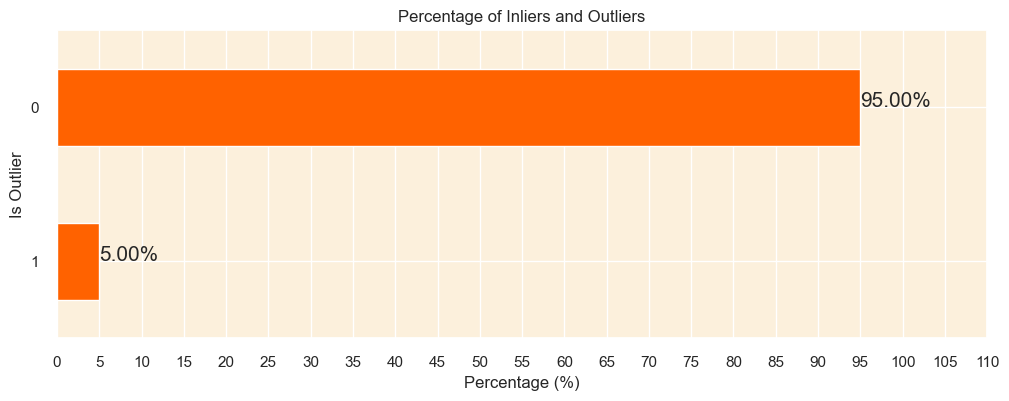

In [63]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [64]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [65]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4062

<a id="correlation"></a>
# <p style="font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | Correlation Analysis</p>


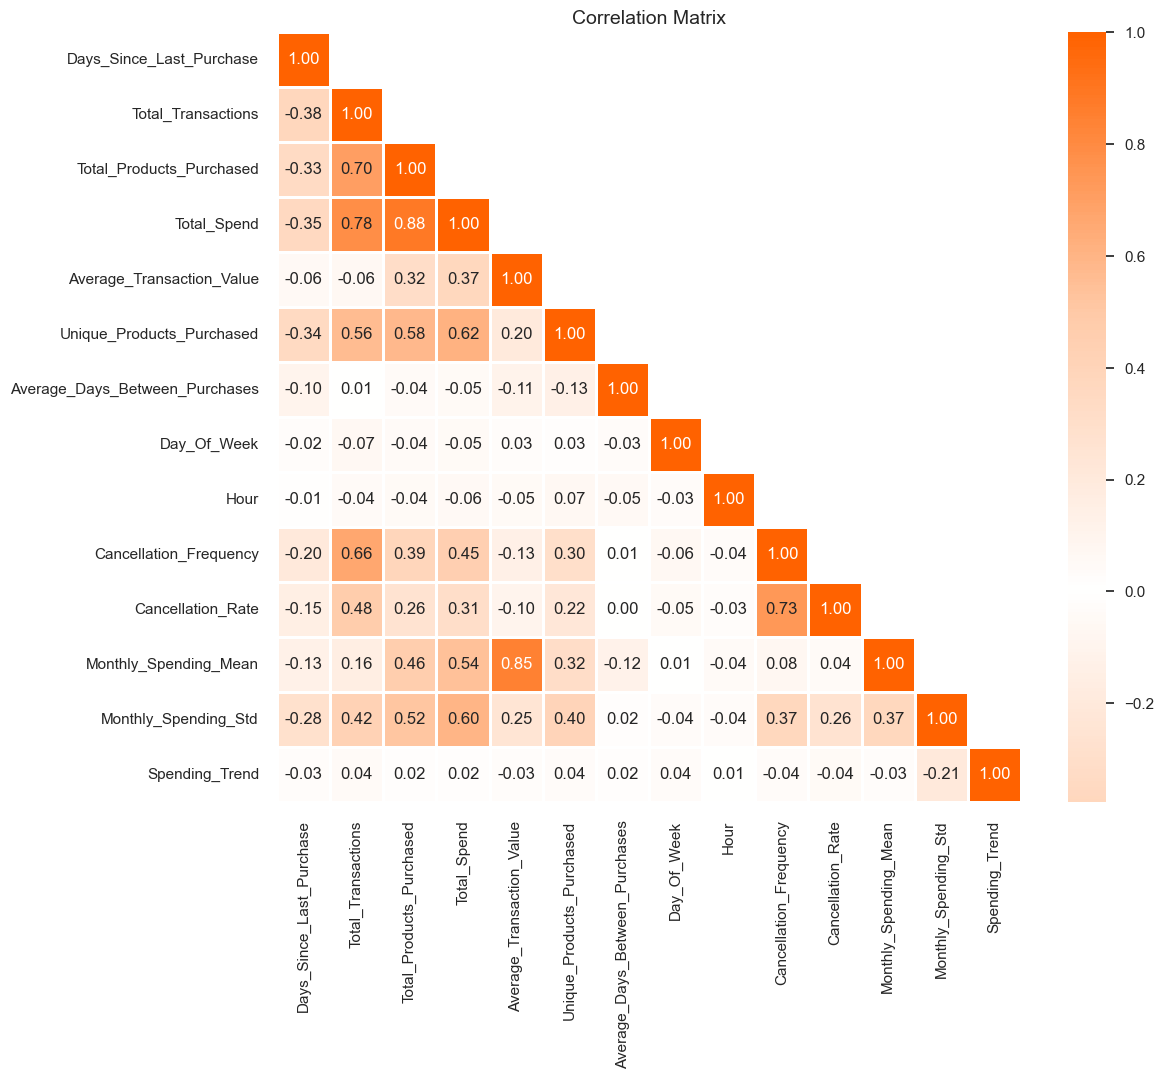

In [66]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

<a id="scaling"></a>
# <p style=" font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Feature Scaling</p>


In [67]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,259266.0,2.352169,-0.482132,-0.777206,-0.850937,-1.296233,-0.921096,-0.320343,6,-1.086574,0.390248,0.376714,-1.262241,-0.719280,0.081553
1,259287.0,-0.905386,0.487383,1.737135,1.962241,1.418337,0.552450,-0.115496,5,-0.216715,-0.530837,-0.408545,0.874045,1.470001,0.231067
2,259308.0,-0.169159,0.002625,1.964002,0.278074,0.337923,-0.570252,0.741413,1,2.827790,-0.530837,-0.408545,0.023791,0.485583,-0.495914
3,259329.0,-0.744021,-0.724510,-0.036656,0.288024,5.297997,0.306859,-0.320343,5,-1.521503,-0.530837,-0.408545,3.927223,-0.719280,0.081553
4,259350.0,2.200889,-0.724510,-0.546813,-0.620730,0.036596,-0.657963,-0.320343,0,1.523002,-0.530837,-0.408545,-0.213344,-0.719280,0.081553


<a id="pca"></a>
# <p style=" font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 8 | Dimensionality Reduction</p>


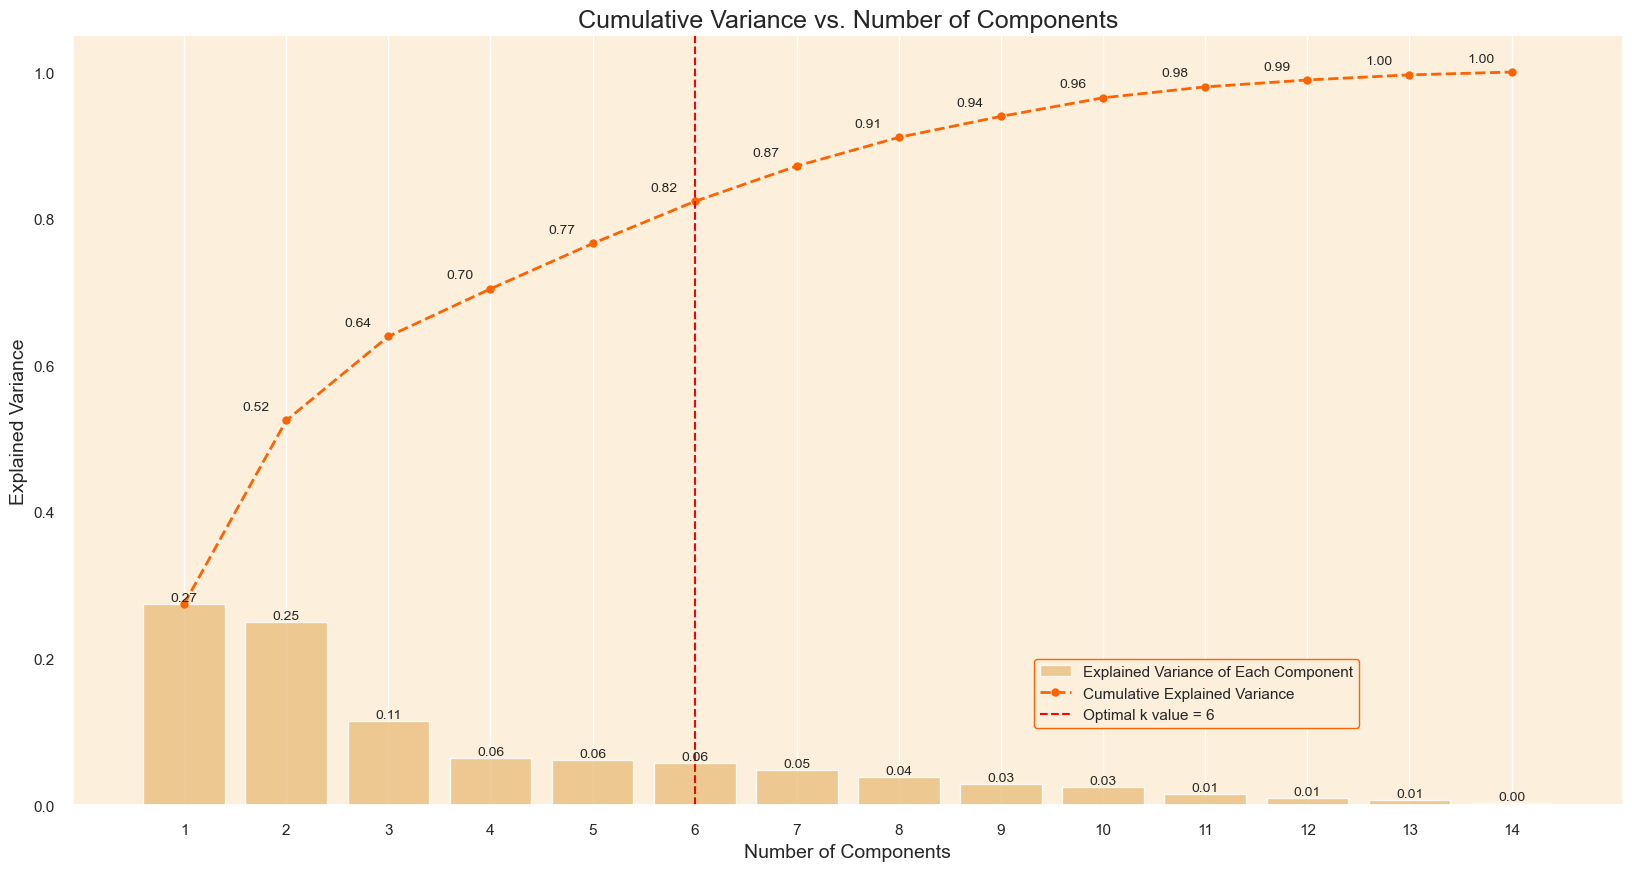

In [68]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [69]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [70]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
259266.0,-3.808420,-0.448419,-1.698504,1.270383,-0.473840,-1.621922
259287.0,-0.701789,3.614411,1.663950,-0.519788,0.631334,0.296636
259308.0,1.891597,-0.302158,0.728377,-0.843380,-0.488189,2.336607
259329.0,-1.550293,2.657886,5.446844,0.877059,0.904851,-1.713707
259350.0,1.445119,-3.120569,0.704547,0.064682,-1.543157,0.033180


In [71]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.087357,-0.201978,0.080612,0.305491,-0.285509,-0.339888
Total_Transactions,0.206681,0.324937,-0.262065,-0.118868,-0.013491,-0.047202
Total_Products_Purchased,0.198318,0.353040,0.073334,-0.127440,0.032670,-0.016327
Total_Spend,0.213027,0.379391,0.077753,-0.086714,0.030633,-0.035184
Average_Transaction_Value,0.051080,0.164004,0.584360,0.111609,0.032252,-0.103435
Unique_Products_Purchased,0.137197,0.307120,0.023140,-0.242079,-0.164194,0.118117
Average_Days_Between_Purchases,0.006313,-0.035591,-0.138799,-0.084749,0.760362,0.211386
Day_Of_Week,-0.871920,0.482751,-0.062942,0.026470,-0.001209,0.012813
Hour,0.004917,-0.029904,-0.009912,-0.284624,-0.514606,0.612023
Cancellation_Frequency,0.168036,0.240075,-0.391376,0.231503,-0.106866,-0.163956


<a id="kmeans"></a>
# <p style=" font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 9 | K-Means Clustering</p>


<a id="optimal_k"></a>
# <b><span style='color:#fcc36d'>Step 9.1 |</span><span style='color:#ff6200'> Determining the Optimal Number of Clusters</span></b>


<a id="elbow"></a>
## <b><span style='color:#fcc36d'>Step 9.1.1 |</span><span style='color:#ff6200'> Elbow Method</span></b>


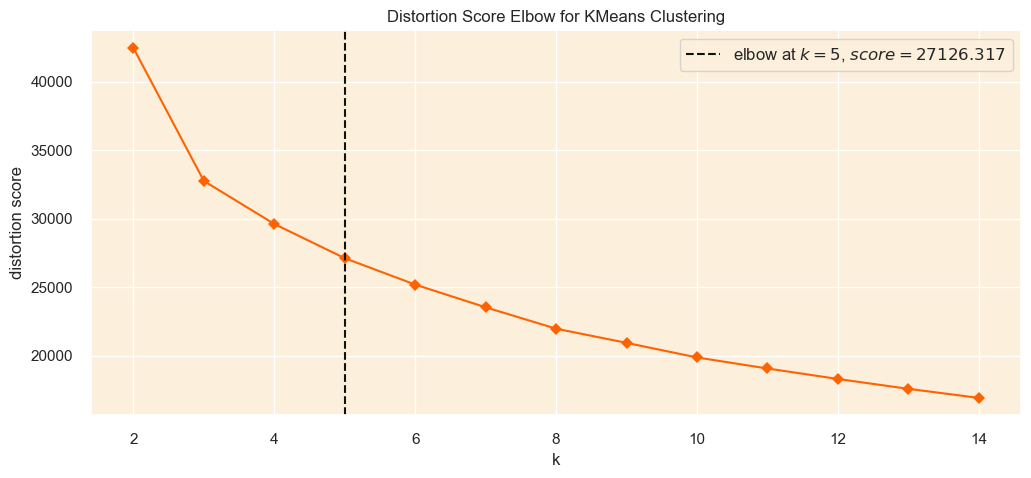

In [72]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

<a id="silhouette"></a>
## <b><span style='color:#fcc36d'>Step 9.1.2 |</span><span style='color:#ff6200'> Silhouette Method</span></b>


In [73]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

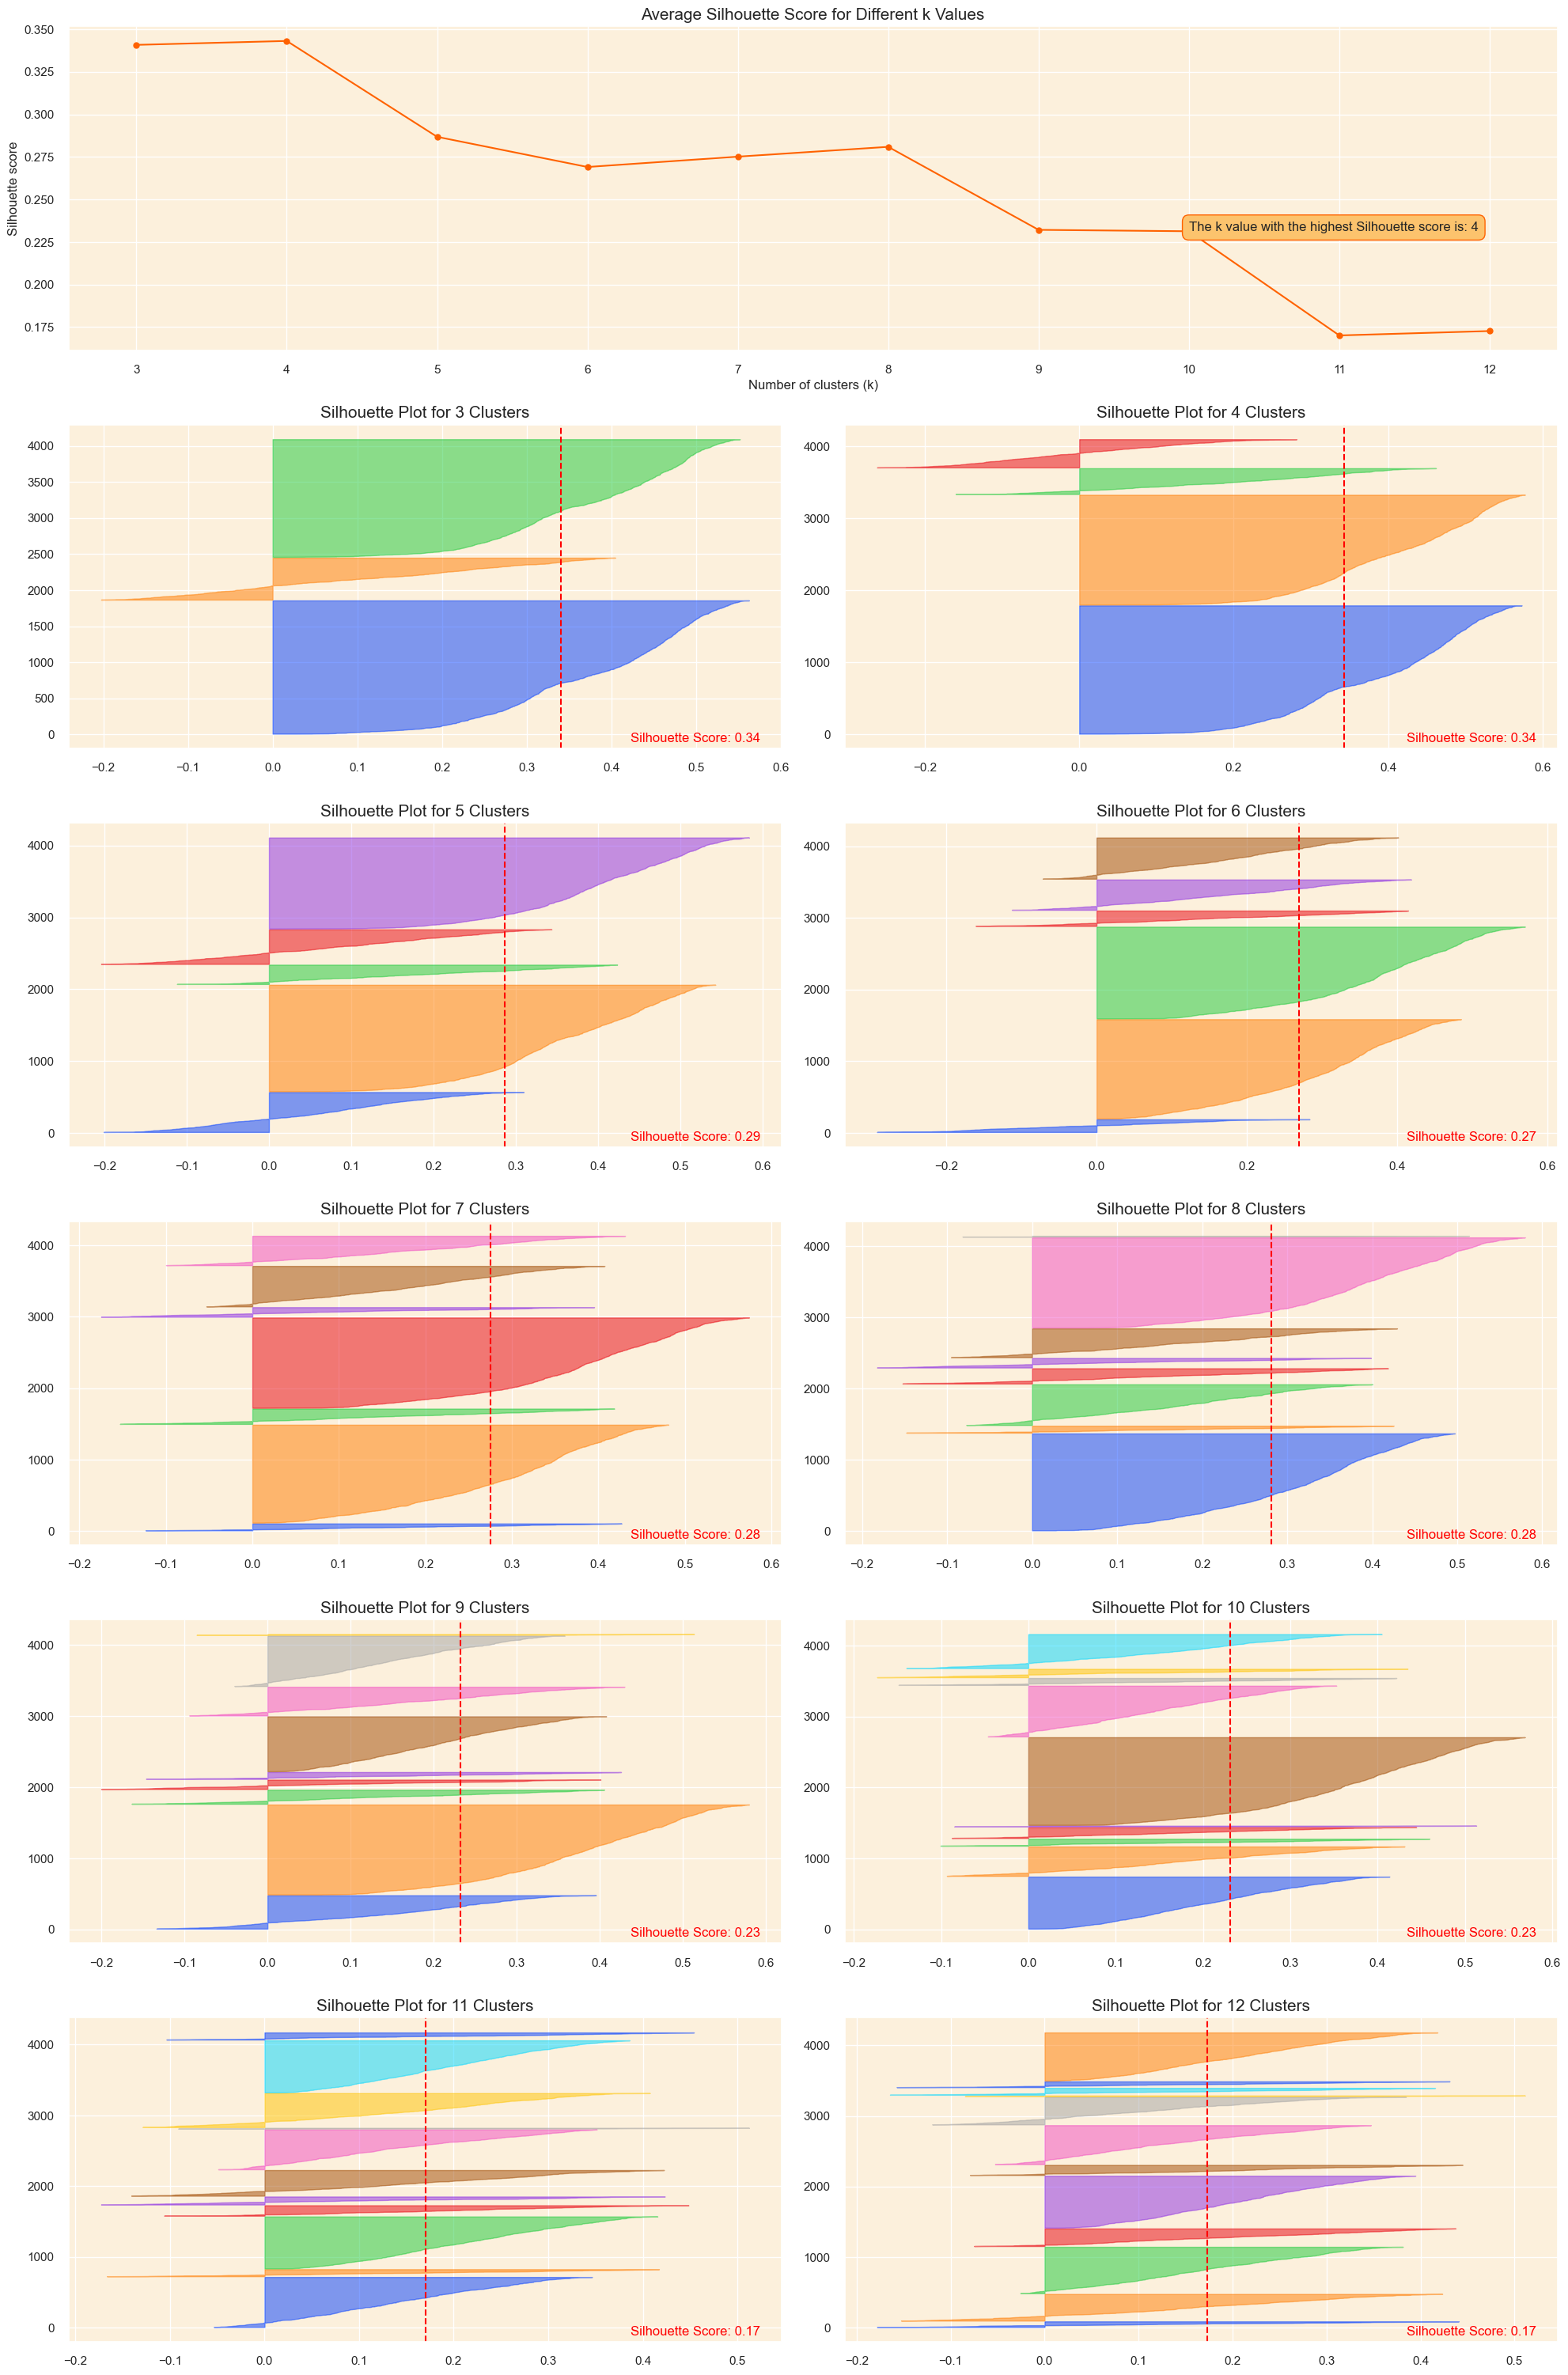

In [74]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

<a id="kmeans_model"></a>
# <b><span style='color:#fcc36d'>Step 9.2 |</span><span style='color:#ff6200'> Clustering Model - K-means</span></b>


In [75]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [76]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,259266.0,325,2,0,0.0,0.0,1,0.0,6,6,1,0.5,0.0,0.0,0.0,0
1,259287.0,2,6,6417,14928.18,2488.03,85,2.1,5,8,0,0.0,2488.03,1537.619795,109.482857,0
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15,0,0.0,1497.78,846.223604,-422.856,1
3,259329.0,18,1,1890,6043.92,6043.92,71,0.0,5,5,0,0.0,6043.92,0.0,0.0,0
4,259350.0,310,1,588,1221.6,1221.6,16,0.0,0,12,0,0.0,1221.6,0.0,0.0,1


<a id="evaluation"></a>
# <p style=" font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 10 | Clustering Evaluation</p>


<a id="3d_visualization"></a>
# <b><span style='color:#fcc36d'>Step 10.1 |</span><span style='color:#ff6200'>  3D Visualization of Top Principal Components</span></b>


In [77]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [78]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

<a id="cluster_distributuion"></a>
# <b><span style='color:#fcc36d'>Step 10.2 |</span><span style='color:#ff6200'>  Cluster Distribution Visualization</span></b>


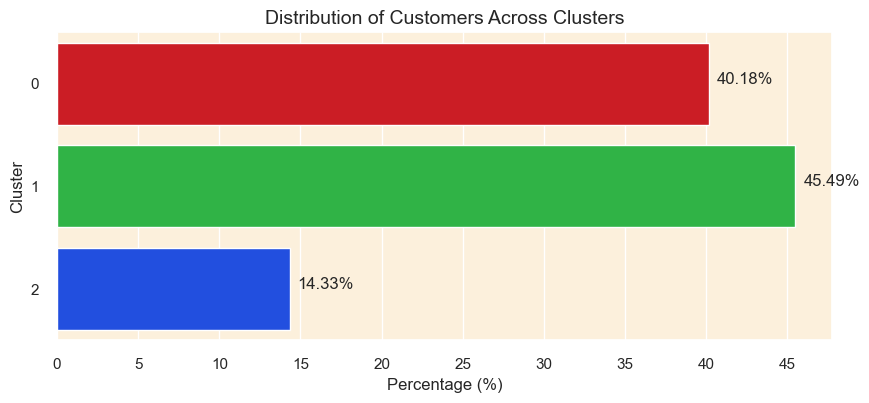

In [79]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

<a id="evaluations_metrics"></a>
# <b><span style='color:#fcc36d'>Step 10.3 |</span><span style='color:#ff6200'> Evaluation Metrics</span></b>


In [80]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4062        |
|    Silhouette Score     | 0.3408538026511151 |
| Calinski Harabasz Score | 1649.3835198672575 |
|  Davies Bouldin Score   | 1.1625543980186528 |
+-------------------------+--------------------+


<a id="profiling"></a>
# <p style=" font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 11 | Cluster Analysis and Profiling</p>


<a id="histogram"></a>
# <b><span style='color:#fcc36d'>Step 11.1 |</span><span style='color:#ff6200'> Histogram Chart Approach</span></b>


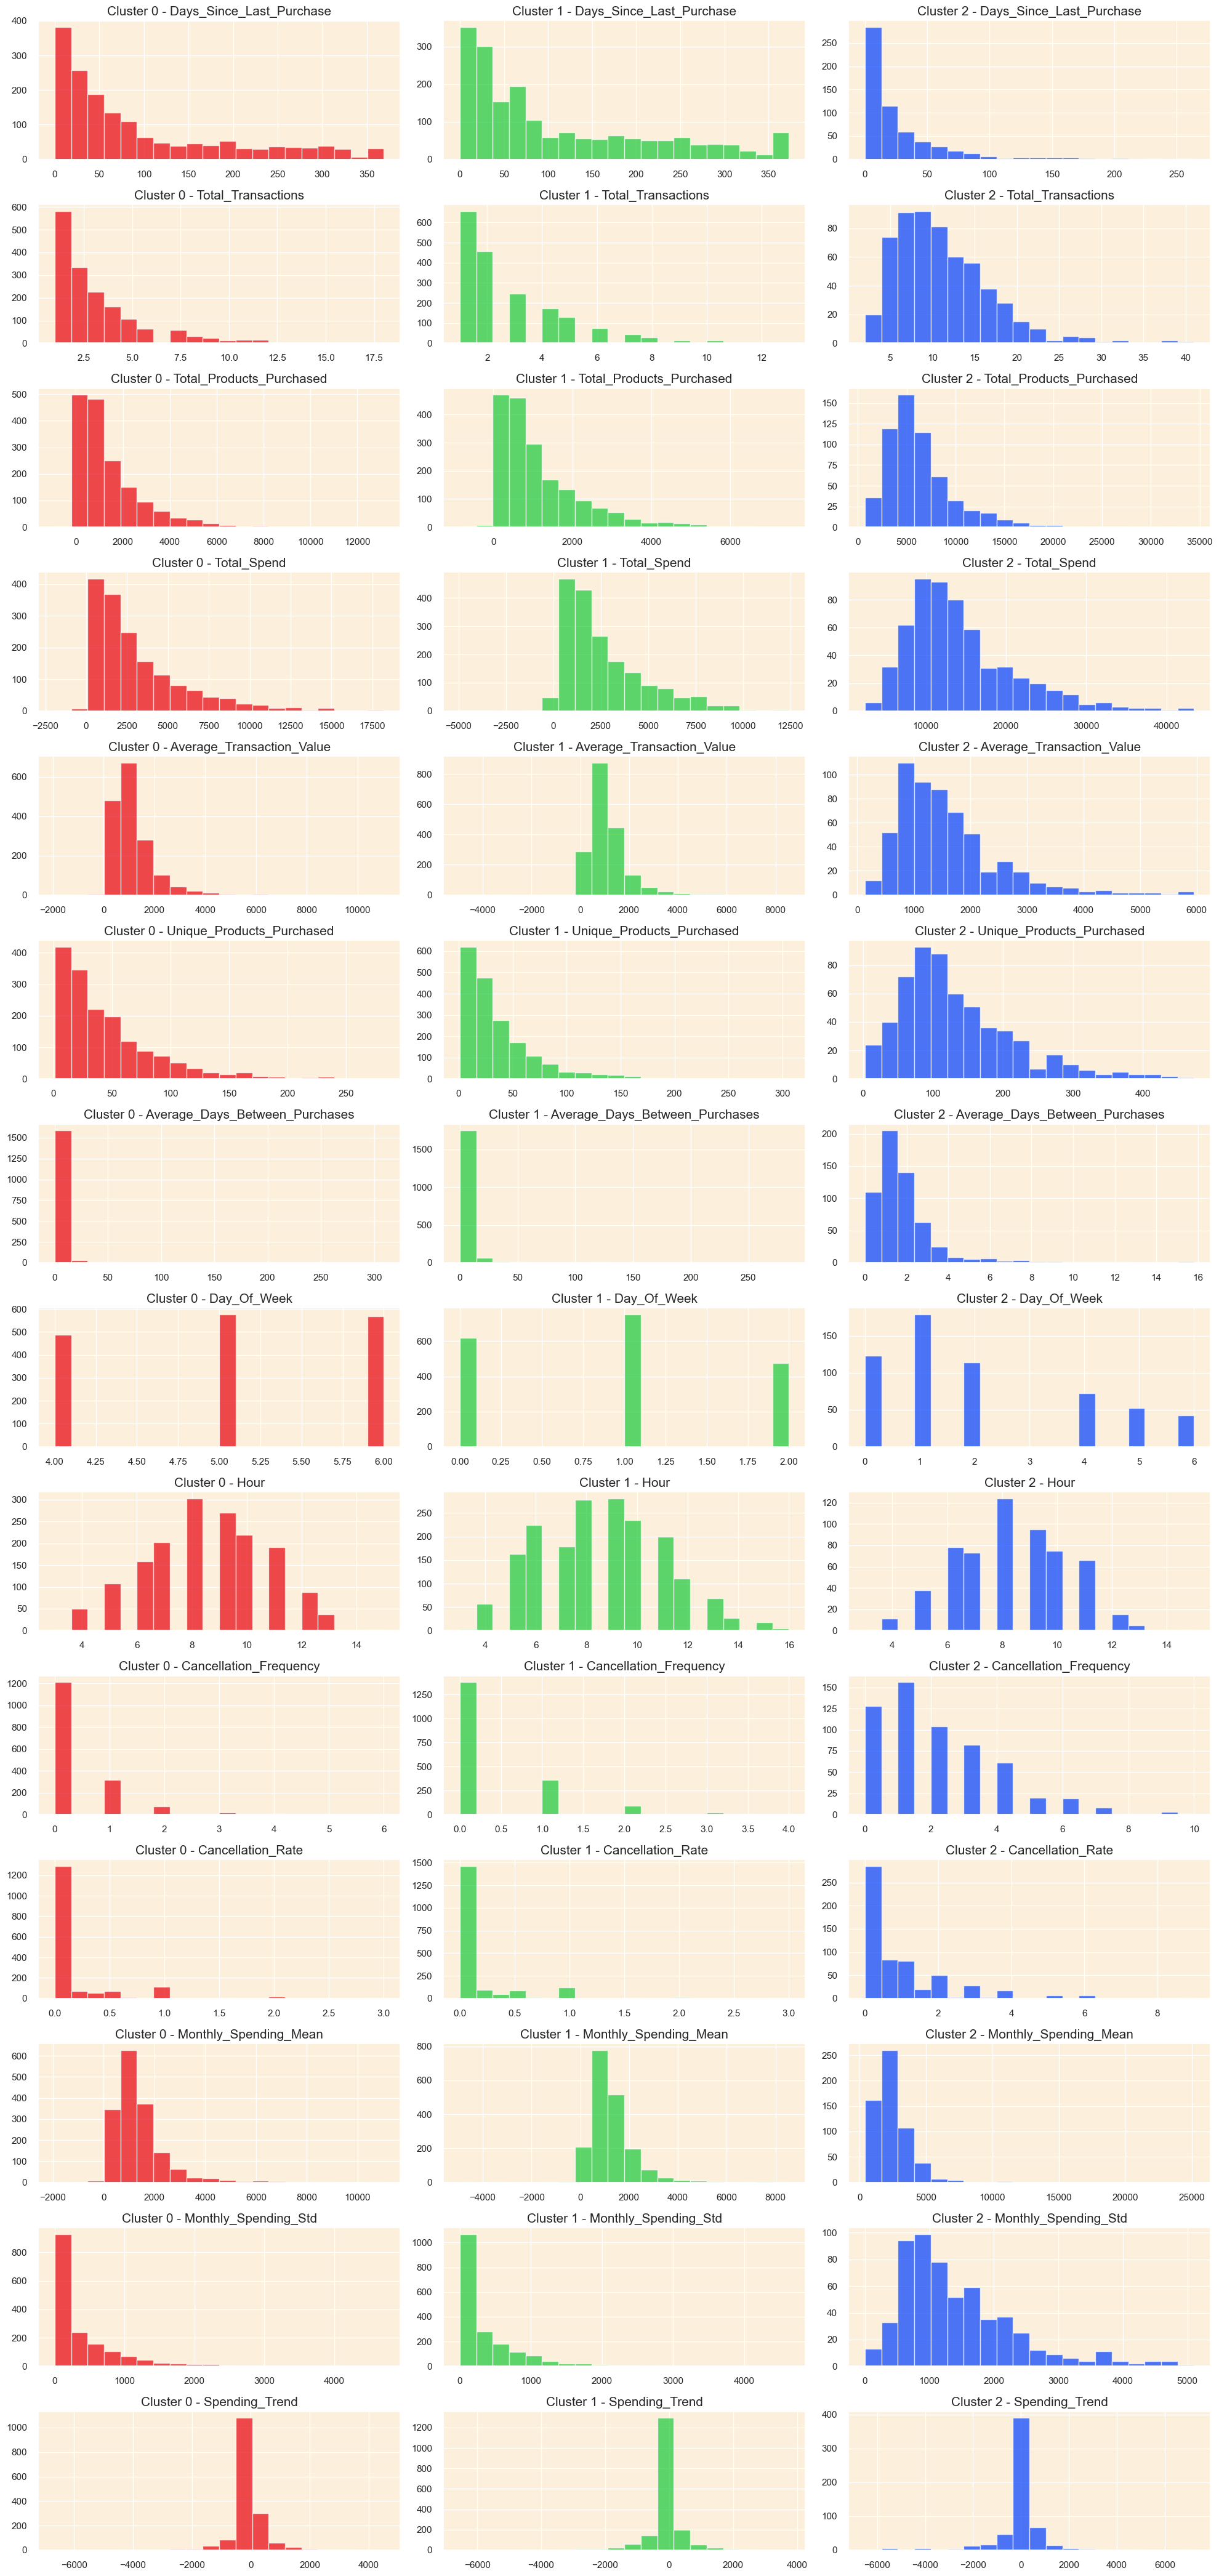

In [81]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

<a id="recommendation_system"></a>
# <p style=" font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 12 | Recommendation System</p>


In [82]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [83]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
298620.0,1765617.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1782459.0,ASSORTED COLOUR BIRD ORNAMENT,1787079.0,JUMBO BAG RED RETROSPOT
377517.0,1782459.0,ASSORTED COLOUR BIRD ORNAMENT,1787079.0,JUMBO BAG RED RETROSPOT,315756.0,ASSORTED COLOURS SILK FAN
300783.0,1765617.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1782459.0,ASSORTED COLOUR BIRD ORNAMENT,1787079.0,JUMBO BAG RED RETROSPOT
356097.0,1765617.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1782459.0,ASSORTED COLOUR BIRD ORNAMENT,1787079.0,JUMBO BAG RED RETROSPOT
305886.0,1782459.0,ASSORTED COLOUR BIRD ORNAMENT,1765617.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1787583.0,WHITE HANGING HEART T-LIGHT HOLDER
303807.0,1782459.0,ASSORTED COLOUR BIRD ORNAMENT,1765617.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1787079.0,JUMBO BAG RED RETROSPOT
341229.0,1765617.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1787079.0,JUMBO BAG RED RETROSPOT,315756.0,ASSORTED COLOURS SILK FAN
370503.0,1765617.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1782459.0,ASSORTED COLOUR BIRD ORNAMENT,1787079.0,JUMBO BAG RED RETROSPOT
337113.0,1782459.0,ASSORTED COLOUR BIRD ORNAMENT,1765617.0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1787583.0,WHITE HANGING HEART T-LIGHT HOLDER


In [84]:
customer_data_cleaned

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,259266.0,325,2,0,0.0,0.0,1,0.0,6,6,1,0.5,0.0,0.0,0.0,0
1,259287.0,2,6,6417,14928.18,2488.03,85,2.1,5,8,0,0.0,2488.03,1537.619795,109.482857,0
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15,0,0.0,1497.78,846.223604,-422.856,1
3,259329.0,18,1,1890,6043.92,6043.92,71,0.0,5,5,0,0.0,6043.92,0.0,0.0,0
4,259350.0,310,1,588,1221.6,1221.6,16,0.0,0,12,0,0.0,1221.6,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,383880.0,277,1,135,748.65,748.65,10,0.0,5,5,0,0.0,748.65,0.0,0.0,0
4058,383901.0,180,1,162,334.8,334.8,7,0.0,4,6,0,0.0,334.8,0.0,0.0,0
4059,383922.0,7,3,294,733.05,244.35,12,9.916667,2,9,1,0.5,366.525,62.175899,-87.93,1
4060,383943.0,3,16,4065,8465.61,529.100625,258,0.465181,1,10,0,0.0,940.623333,853.184711,217.2925,2


In [85]:
from gensim.models import Word2Vec

# Prepare sequences: Treat each customer's purchases as a "sentence" of products
purchase_sequences = merged_data.groupby('CustomerID')['Description'].apply(list).tolist()

# Train a Word2Vec model on these sequences
model_w2v = Word2Vec(sentences=purchase_sequences, vector_size=100, window=5, min_count=1, workers=4)

# After training, you can get vectors for each item and use these vectors to find similar items
item_vector = model_w2v.wv["POPPY'S PLAYHOUSE LIVINGROOM "]  # Example StockCode

# Find similar items
similar_items = model_w2v.wv.most_similar("POPPY'S PLAYHOUSE LIVINGROOM ", topn=5)


In [86]:
similar_items

[("POPPY'S PLAYHOUSE BEDROOM ", 0.9954451322555542),
 ('FELTCRAFT GIRL NICOLE KIT', 0.9918519854545593),
 ('WORLD WAR 2 GLIDERS ASSTD DESIGNS', 0.9917754530906677),
 ("POPPY'S PLAYHOUSE KITCHEN", 0.9909946918487549),
 ('PAINT YOUR OWN CANVAS SET', 0.9898383021354675)]